In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pandas.plotting import scatter_matrix



In [7]:
sns.set_theme(palette="mako")

In [9]:
csv = pd.read_csv("heart.csv")
df = csv.copy()


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [23]:
cat_cols = df[["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]]
cat_cols.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


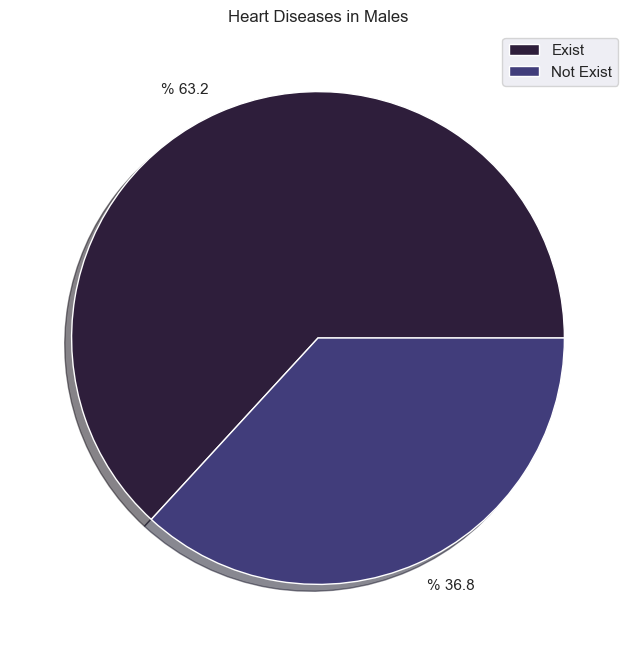

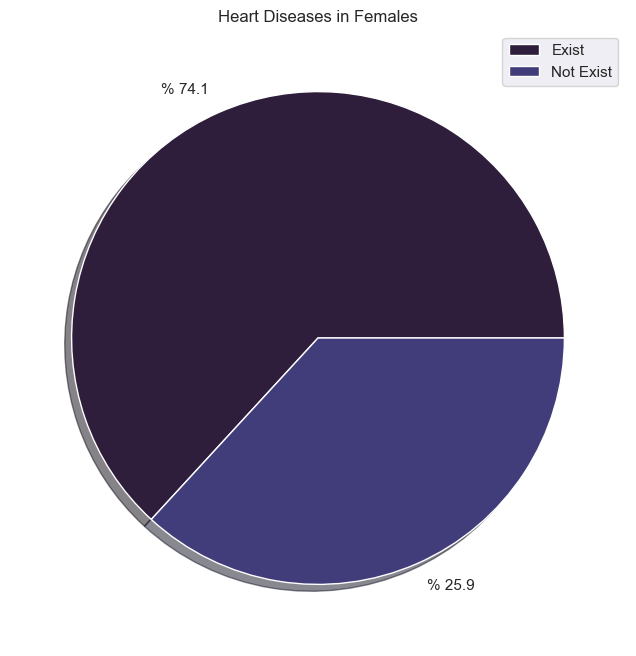

In [24]:
# Insight : The rate of heart disease in female patients is higher than the rate of heart disease in male patients. Maybe the number of observations of female patients is less.

m_array = np.array(df.loc[(df["Sex"] == "M")]["HeartDisease"].value_counts(normalize=True) * 100)
n_array = np.array(df.loc[(df["Sex"] == "F")]["HeartDisease"].value_counts(normalize=True) * 100)

def male_pie():
    plt.figure(figsize=(15,8))
    plt.pie(m_array,labels=["% " + str(round(m_array[0],1)),"% " + str(round(m_array[1],1))],shadow=True)
    plt.title("Heart Diseases in Males")
    plt.legend(labels=["Exist","Not Exist"])
    plt.show()
    
def female_pie():
    plt.figure(figsize=(15,8))
    plt.pie(m_array,labels=["% " + str(round(n_array[0],1)),"% " + str(round(n_array[1],1))],shadow=True)
    plt.title("Heart Diseases in Females")
    plt.legend(labels=["Exist","Not Exist"])
    plt.show()
    
male_pie()
female_pie()

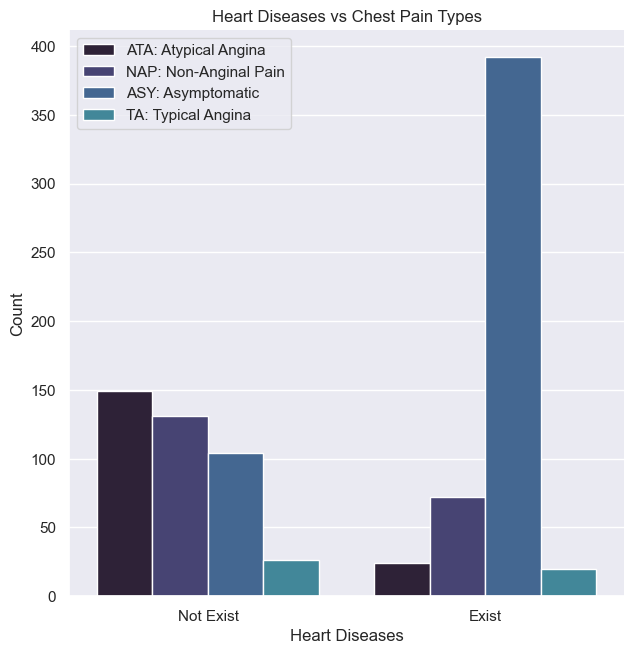

In [37]:
# Insight : Asymptomatic chest pain type is the most seen type who has heart disease.

def cpt_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ChestPainType",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Chest Pain Types",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["ATA: Atypical Angina","NAP: Non-Anginal Pain","ASY: Asymptomatic","TA: Typical Angina"])
    
cpt_catplot()

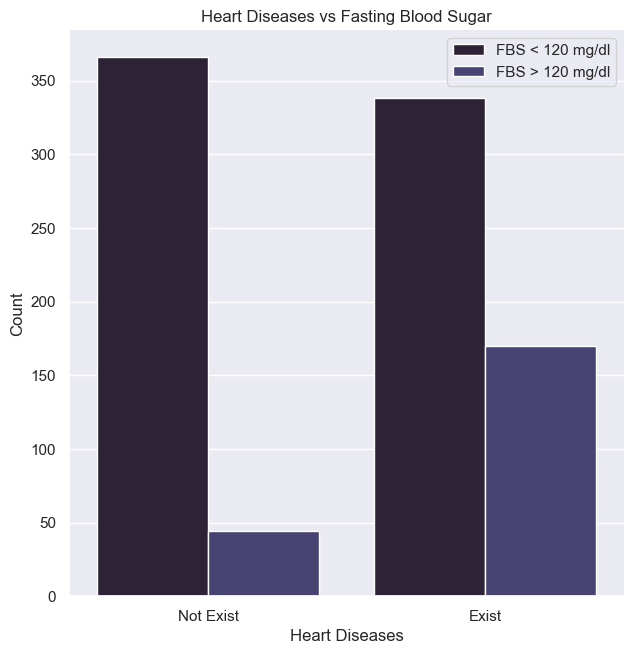

In [26]:
# Fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise

# Insight : High fasting blood sugar values are more common in people with heart disease than those without heart disease.

def fbs_catplot():
    ax = sns.catplot(x="HeartDisease",hue="FastingBS",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Fasting Blood Sugar",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["FBS < 120 mg/dl","FBS > 120 mg/dl"])

fbs_catplot()

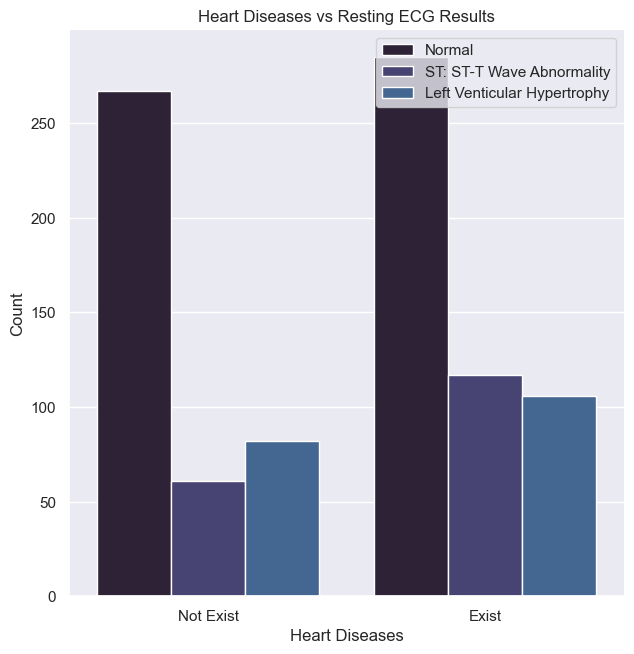

In [38]:
def recg_catplot():
    ax = sns.catplot(x="HeartDisease",hue="RestingECG",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Resting ECG Results",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["Normal", "ST: ST-T Wave Abnormality","Left Venticular Hypertrophy"])

recg_catplot()

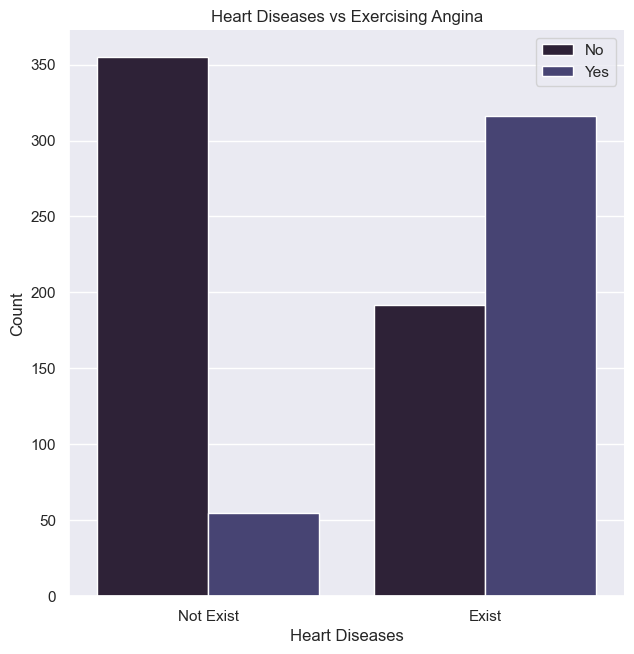

In [28]:
# Insight : Exercise angina is common in people with heart disease.

def ea_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ExerciseAngina",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Exercising Angina",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["No", "Yes"])

ea_catplot()

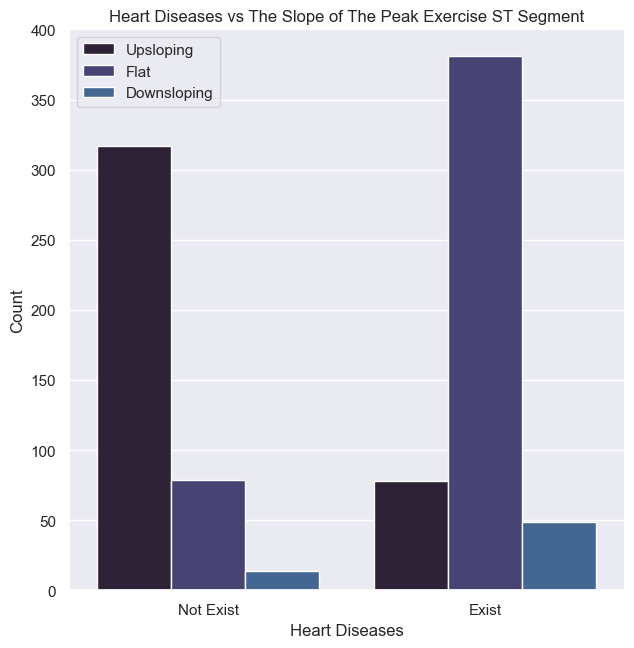

In [29]:
def stslpoe_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ST_Slope",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs The Slope of The Peak Exercise ST Segment",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["Upsloping", "Flat","Downsloping"])

stslpoe_catplot()

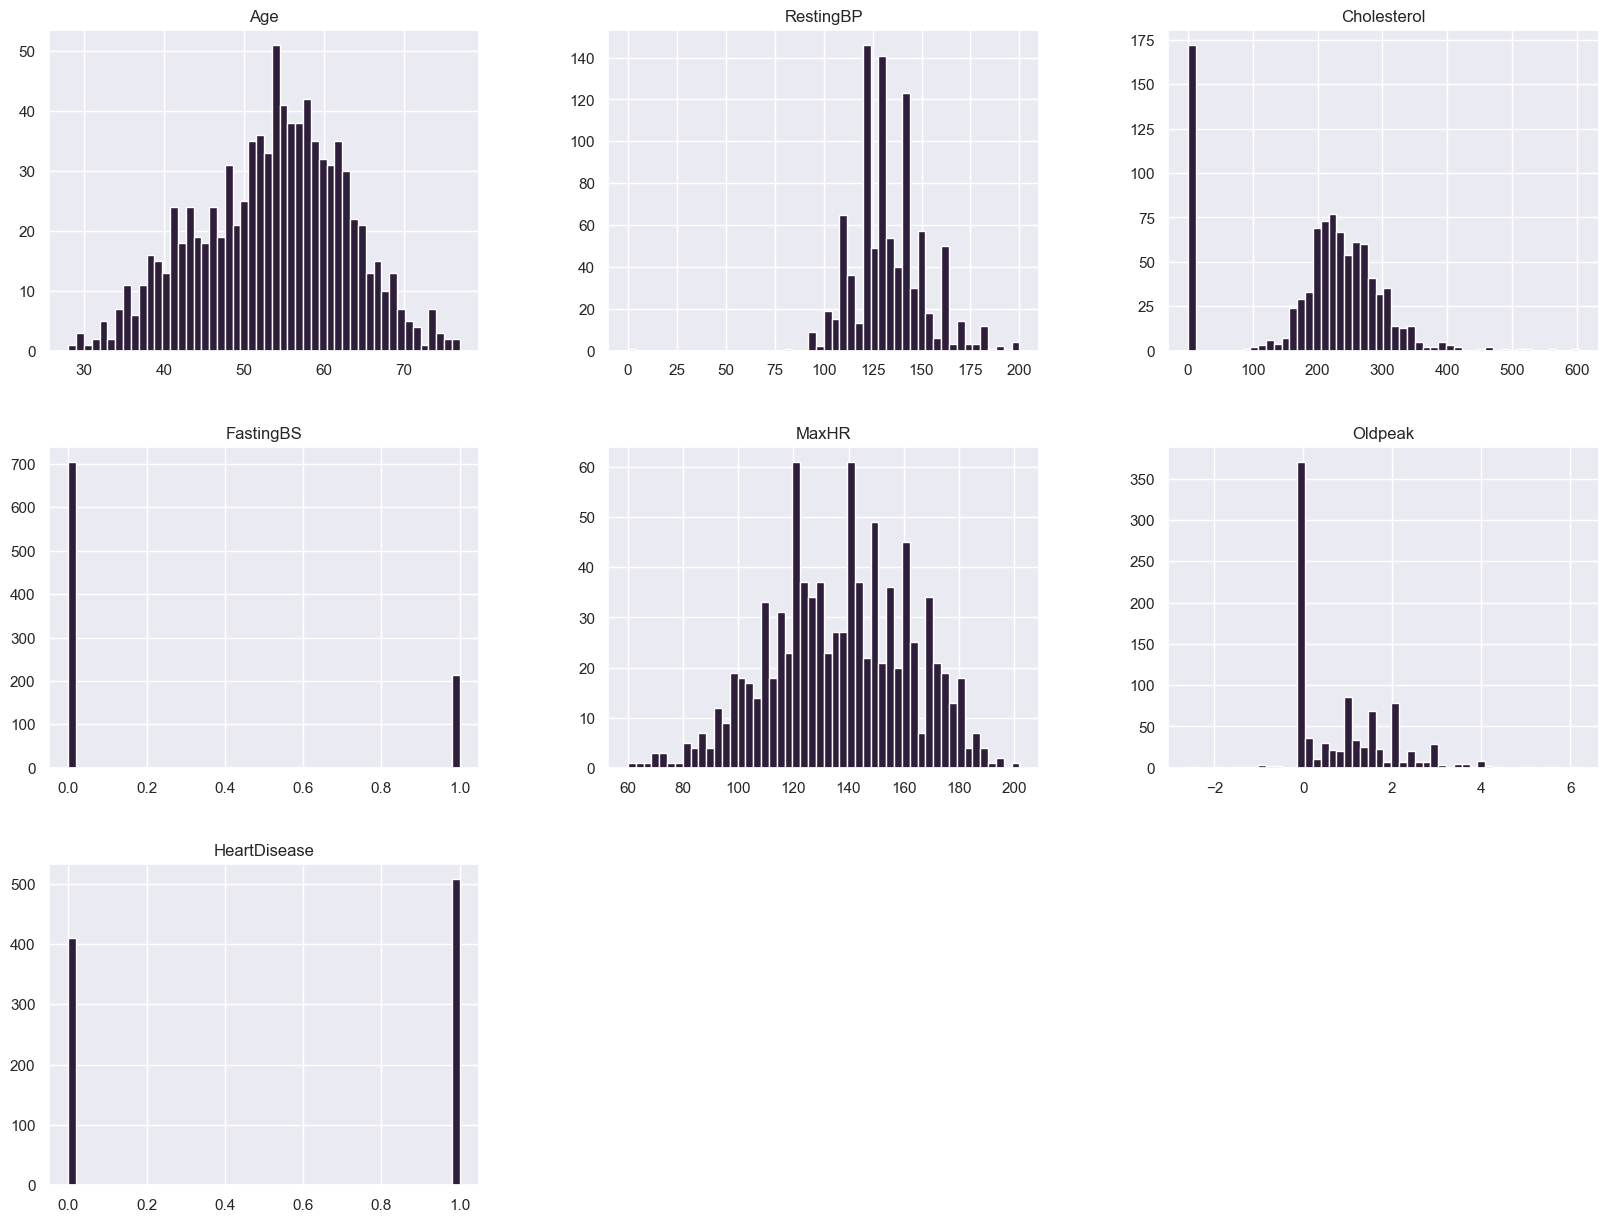

In [30]:
df.hist(bins=50, figsize=(20,15))
plt.show() 

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Age'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Age'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='Age'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Age'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='RestingBP'>],
       [<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Cholesterol'>

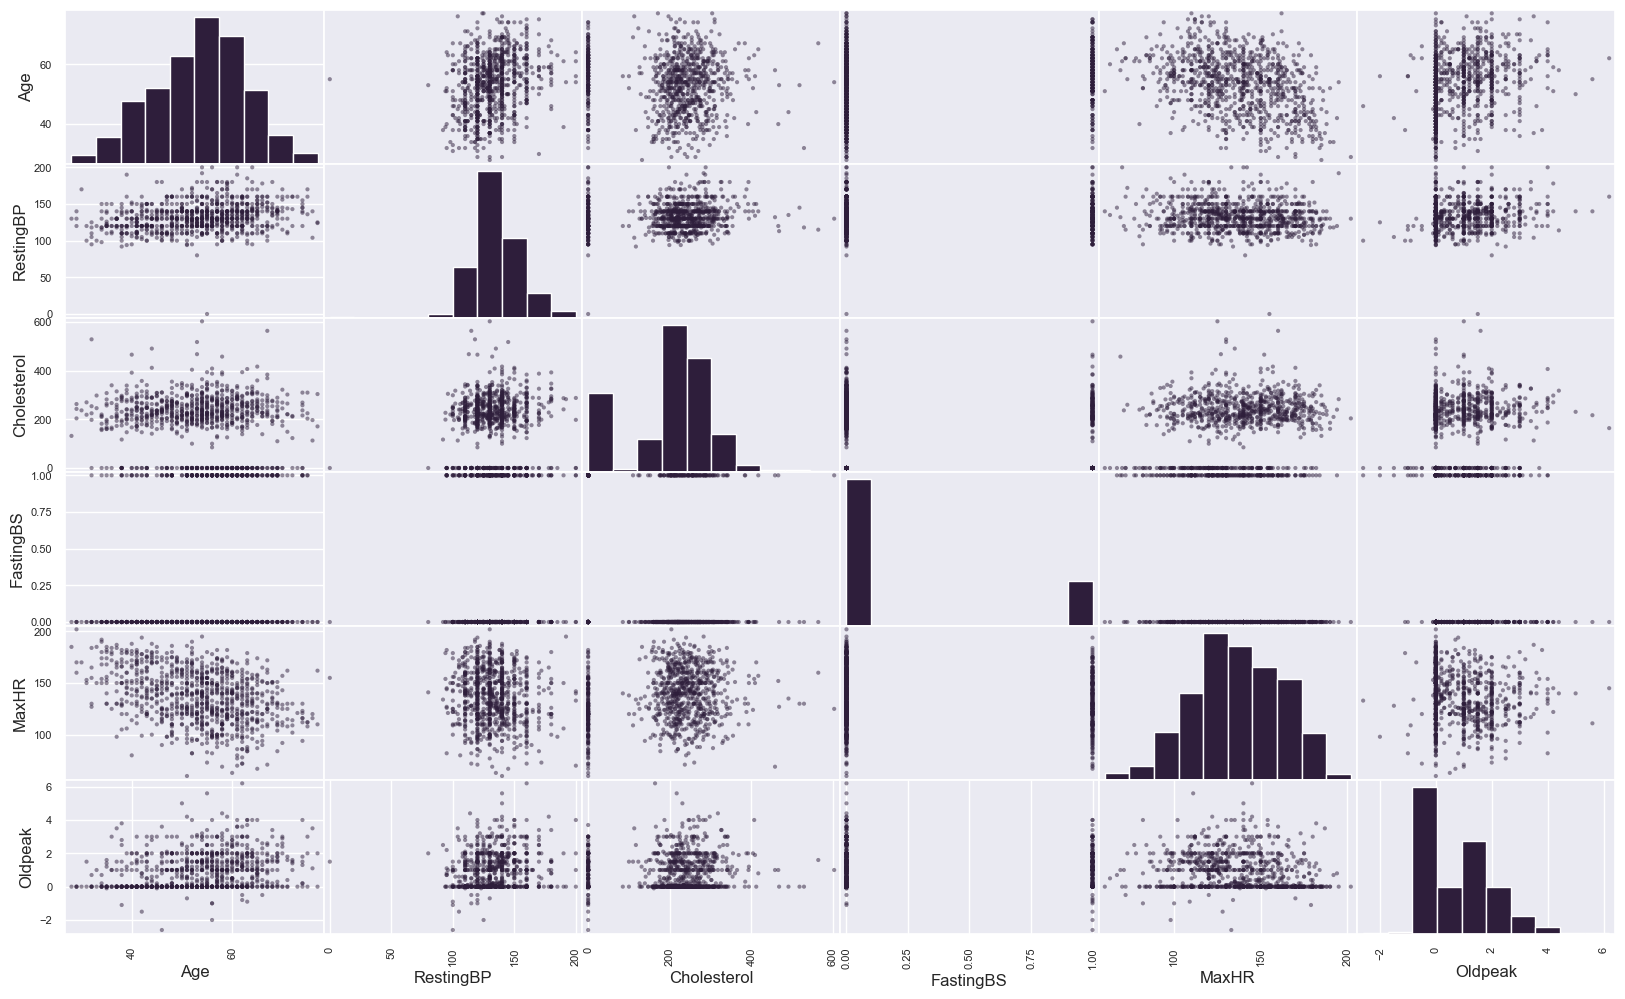

In [40]:
attributes = ["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]
scatter_matrix(df[attributes], figsize=(20, 12))

<AxesSubplot:>

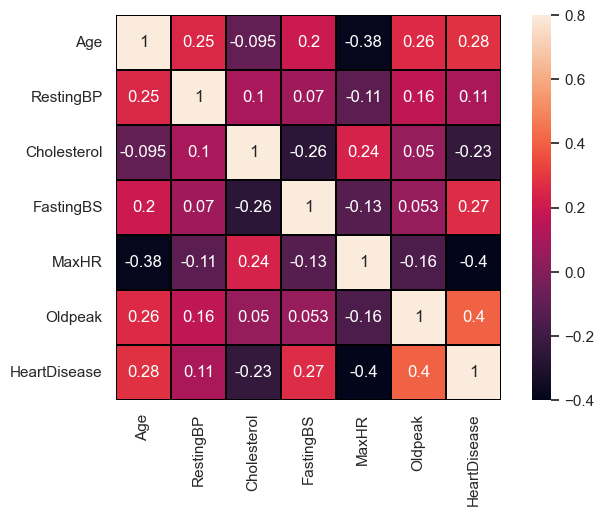

In [42]:
# Visualisation of correlations between the numerical values
corr = cat_cols.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, vmax=.8, linewidths=0.05, square=True, annot=True, linecolor="black")

In [34]:
# Age: Age of the patient [Years]
# Sex: Sex of the patient [M: Male, F: Female]
# ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: Resting blood pressure [mm Hg]
# Cholesterol: Serum cholesterol [mg/dL]
# FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
# Oldpeak: Oldpeak = ST [Numeric value measured in depression]
# ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: Output class [1: heart disease, 0: Normal]